In [22]:
import numpy as np
import pandas as pd
import time
import os
import tensorflow as tf
tf.config.run_functions_eagerly(False)
from VaDER.vader import VADER

save_path = os.path.join('test_vader', 'vader.ckpt')

np.random.seed(123)

In [93]:
X = np.load('/Users/amosavni/university/DeepLearningWorkshop/deepcell_mod/DL-WORKSHOP/npy_files/tracks_centandmorph.npy')
y = np.load('/Users/amosavni/university/DeepLearningWorkshop/deepcell_mod/DL-WORKSHOP/npy_files/labels_centandmorph.npy')
print(len(X),len(y))
X_train, y_train = X, y

5974 5974


In [94]:
# normalize (better for fitting)
for i in np.arange(X_train.shape[2]):
    X_train[:,:,i] = (X_train[:,:,i] - np.mean(X_train[:,:,i])) / np.std(X_train[:,:,i])

In [95]:
W_train = np.random.choice([1,2], X_train.shape, p=[0.2, 0.8])

In [96]:
vader = VADER(X_train=X_train, W_train=W_train, save_path=save_path, n_hidden=[64, 4], k=3,
              learning_rate=1e-3, output_activation=None, recurrent=True, cell_type="GRU", batch_size=64)
# pre-train without latent loss
start = time.time()
vader.pre_fit(n_epoch=50, verbose=True)
# train with latent loss
vader.fit(n_epoch=50, verbose=True)
end = time.time()
print("Elapsed: ", end - start)

INFO:tensorflow:Assets written to: test_vader/vader.ckpt/assets


INFO:tensorflow:Assets written to: test_vader/vader.ckpt/assets


-1 tot_loss: 60.29 	rec_loss: 56.77 	lat_loss: 3.52
1 tot_loss: 26.92 	rec_loss: 26.92 	lat_loss: 24.04
2 tot_loss: 29.68 	rec_loss: 29.68 	lat_loss: 18.55
3 tot_loss: 23.98 	rec_loss: 23.98 	lat_loss: 18.82
4 tot_loss: 21.25 	rec_loss: 21.25 	lat_loss: 18.02
5 tot_loss: 23.87 	rec_loss: 23.87 	lat_loss: 18.51
6 tot_loss: 20.22 	rec_loss: 20.22 	lat_loss: 18.63
7 tot_loss: 21.34 	rec_loss: 21.34 	lat_loss: 18.62
8 tot_loss: 20.65 	rec_loss: 20.65 	lat_loss: 18.61
9 tot_loss: 19.87 	rec_loss: 19.87 	lat_loss: 19.34
10 tot_loss: 21.57 	rec_loss: 21.57 	lat_loss: 19.64
11 tot_loss: 19.61 	rec_loss: 19.61 	lat_loss: 19.61
12 tot_loss: 18.72 	rec_loss: 18.72 	lat_loss: 19.63
13 tot_loss: 19.22 	rec_loss: 19.22 	lat_loss: 19.80
14 tot_loss: 19.90 	rec_loss: 19.90 	lat_loss: 20.18
15 tot_loss: 19.03 	rec_loss: 19.03 	lat_loss: 20.31
16 tot_loss: 21.08 	rec_loss: 21.08 	lat_loss: 20.58
17 tot_loss: 20.10 	rec_loss: 20.10 	lat_loss: 20.91
18 tot_loss: 21.42 	rec_loss: 21.42 	lat_loss: 21.74
19 

INFO:tensorflow:Assets written to: test_vader/vader.ckpt/assets


INFO:tensorflow:Assets written to: test_vader/vader.ckpt/assets


-1 tot_loss: 18.14 	rec_loss: 18.14 	lat_loss: 25.32


/Users/amosavni/Library/Python/3.8/lib/python/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("PartitionedCall_3:4", shape=(384,), dtype=int32), values=Tensor("PartitionedCall_3:3", shape=(384, 4), dtype=float32), dense_shape=Tensor("PartitionedCall_3:5", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.

/Users/amosavni/Library/Python/3.8/lib/python/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("PartitionedCall_3:1", shape=(192,), dtype=int32), values=Tensor("PartitionedCall_3:0", shape=(192, 4), dtype=float32), dense_shape=Tensor("PartitionedCall_3:2", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.

/Users/amosavni/Library/Python/3.8/lib/python/site-packages/tensorflow/python/framework/in

51 tot_loss: 28.23 	rec_loss: 22.08 	lat_loss: 6.14
52 tot_loss: 26.80 	rec_loss: 20.89 	lat_loss: 5.90
53 tot_loss: 25.72 	rec_loss: 19.89 	lat_loss: 5.84
54 tot_loss: 26.67 	rec_loss: 20.97 	lat_loss: 5.70
55 tot_loss: 26.16 	rec_loss: 20.31 	lat_loss: 5.85
56 tot_loss: 26.46 	rec_loss: 20.79 	lat_loss: 5.67
57 tot_loss: 27.01 	rec_loss: 21.10 	lat_loss: 5.91
58 tot_loss: 26.84 	rec_loss: 20.99 	lat_loss: 5.85
59 tot_loss: 26.97 	rec_loss: 21.12 	lat_loss: 5.85
60 tot_loss: 26.52 	rec_loss: 20.88 	lat_loss: 5.65
61 tot_loss: 26.96 	rec_loss: 21.13 	lat_loss: 5.83
62 tot_loss: 26.33 	rec_loss: 20.68 	lat_loss: 5.65
63 tot_loss: 25.92 	rec_loss: 20.19 	lat_loss: 5.74
64 tot_loss: 27.05 	rec_loss: 21.19 	lat_loss: 5.86
65 tot_loss: 26.57 	rec_loss: 20.83 	lat_loss: 5.74
66 tot_loss: 26.62 	rec_loss: 20.95 	lat_loss: 5.67
67 tot_loss: 27.46 	rec_loss: 21.54 	lat_loss: 5.92
68 tot_loss: 27.04 	rec_loss: 21.19 	lat_loss: 5.85
69 tot_loss: 27.36 	rec_loss: 21.61 	lat_loss: 5.75
70 tot_loss:

INFO:tensorflow:Assets written to: test_vader/vader.ckpt/assets


INFO:tensorflow:Assets written to: test_vader/vader.ckpt/assets


Elapsed:  61.356764793395996


In [97]:
# get the clusters
c = vader.cluster(X_train)
# get the re-constructions
p = vader.predict(X_train)
# compute the loss given the network
l = vader.get_loss(X_train)

In [102]:
print(pd.Series(c).value_counts())

1    5481
2     271
0     222
dtype: int64


In [103]:
latent = vader.map_to_latent(X_train)

In [100]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plt

def plot_clustering_matplotlib(z_run, labels):

    labels = labels[:z_run.shape[0]] # because of weird batch_size

    hex_colors = []
    for _ in np.unique(labels):
        hex_colors.append('#%06X' % randint(0, 0xFFFFFF))

    colors = [hex_colors[int(i)] for i in labels]

    z_run_pca = TruncatedSVD(n_components=3).fit_transform(z_run)
    z_run_tsne = TSNE(perplexity=80, min_grad_norm=1E-12, n_iter=3000).fit_transform(z_run)

    plt.scatter(z_run_pca[:, 0], z_run_pca[:, 1], c=colors, marker='*', linewidths=0)
    plt.title('PCA on z_run')
    plt.show()

    plt.scatter(z_run_tsne[:, 0], z_run_tsne[:, 1], c=colors, marker='*', linewidths=0)
    plt.title('tSNE on z_run')
    plt.show()

    

In [107]:
for i in zip(latent,c,y_train):
    print(i)


(array([ 1.1981616 , -0.82043153,  0.76027477,  1.4358379 ], dtype=float32), 1, 'E5')
(array([ 1.6115091, -1.7650621, -1.0708748,  2.3219204], dtype=float32), 1, 'E5')
(array([ 1.4481325 , -0.6884388 ,  0.87604403,  2.5046136 ], dtype=float32), 1, 'E5')
(array([ 0.77918   , -1.4810466 , -0.38514495,  1.3119476 ], dtype=float32), 1, 'E5')
(array([ 0.30877563, -0.6278768 , -1.3137531 ,  0.5863711 ], dtype=float32), 1, 'E5')
(array([ 0.18068391, -1.024826  , -0.14648014,  2.1544366 ], dtype=float32), 1, 'E5')
(array([ 1.2257286 , -2.18965   , -0.59504294,  0.8948719 ], dtype=float32), 1, 'E5')
(array([ 2.0024805, -0.3709681, -1.1036695,  2.022476 ], dtype=float32), 1, 'E5')
(array([ 0.52841765, -1.2098913 , -1.4095278 ,  3.0100088 ], dtype=float32), 1, 'E5')
(array([-1.4278309 ,  0.8480675 , -1.3289108 ,  0.70587057], dtype=float32), 1, 'E5')
(array([ 1.8743052 ,  0.2424373 , -2.220853  , -0.45782828], dtype=float32), 2, 'E5')
(array([ 1.8160955 , -0.54765046, -0.00196454,  0.8772155 ], d

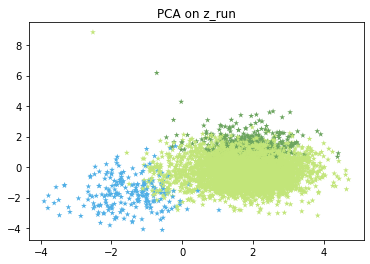

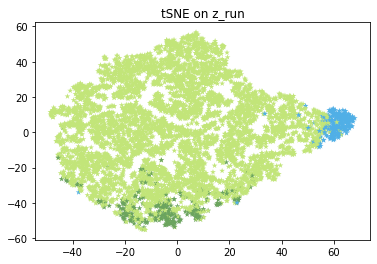

In [106]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labs = le.fit_transform(y_train)
plot_clustering_matplotlib(latent,c)